# Pymaceuticals Inc.
---

### Analysis

The drug with the most similar observed results to Capomulin is Ramicane. In fact, it Ramicane may be even more effective. Although both have a similar number of timepoints, the box plot analysis shows very similar results om final tumor volume. Ramicane has a lower overall median of tumors compared to Capomulin and has less interquartile volatility, meaning its results were more clustered. This could indicate more consistency across all mice tested. Capomulin, meanwhile, has a larger range. Infubinol has a major outlier that puts it on par to Ramicane and Capomulin; otherwise, it performs the worst. Ceftamin has the least variance, but consistently performs worse than Capomulin and Ramicane. 

Capomulin seems to be most effective after the 5th and 6th treatments. It appears to have a delayed effect, as evidenced by the brief increase in tumor volume between treatments 1-4 and possibly after the 8th treatment. Further research would be required to determine if other variables may be causing those increases, such as the stage/severity of the skin cancer or other environmental factors. As there was no control group in this study, we have no idea as to how the tumor volume would have worsened or improved without the Capomulin. The increases after certain rounds of treatments could be a worrisome development. 

Lastly, there is a strong positive correlation between mouse weight and average observed tumor volume for the Capomulin regimen. In other words, we can reasonably expect that mice with higher weights will see more tumor volume when using Capomulin. This does not mean Capomulin causes more tumors in heavier mice, but it does merit a follow-up study to determine if, and potentially why, this would be the case. If this correlation holds to humans, it could mean heavier or obese skin cancer patients would not be ideal candidates for the Capomulin drug. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results,on=["Mouse ID"])


# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].nunique()
print(mouse_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])]

print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study[mouse_study["Mouse ID"] == "g989"]

print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study=mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]

clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data = clean_mouse_study.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = regimen_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})
print(summary_stats) 

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

print(summary_stats_single_line)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

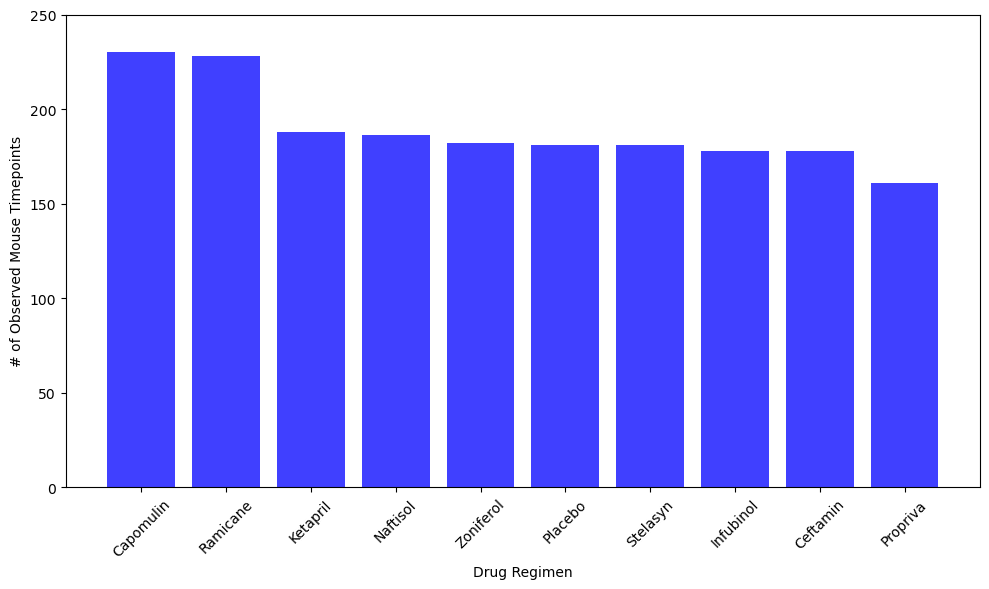

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mouse_study['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue', alpha=0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)  
plt.ylim(0,250)
plt.tight_layout()

plt.show()


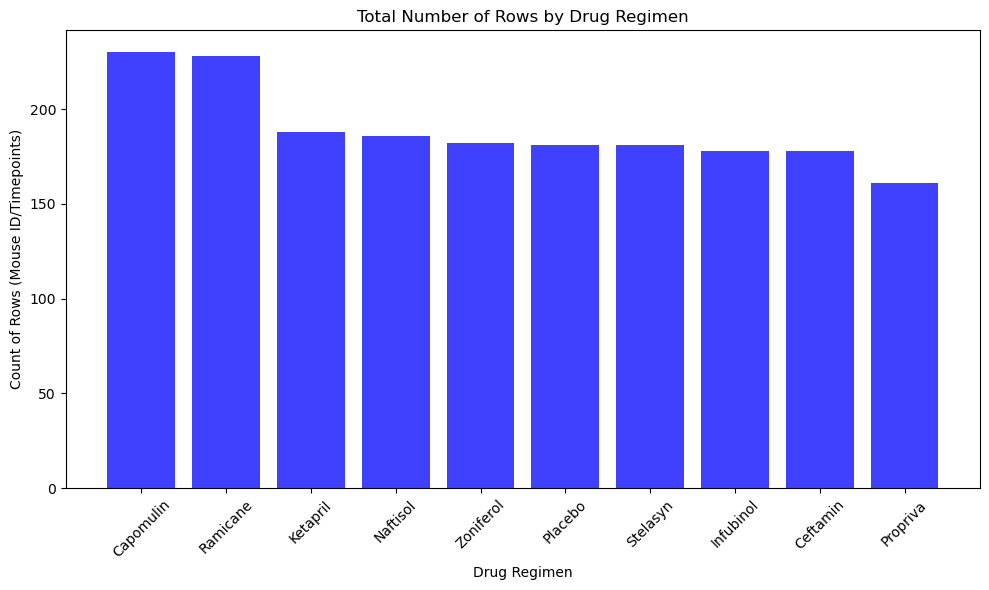

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = clean_mouse_study['Drug Regimen'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue', alpha=0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows by Drug Regimen')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()


plt.show()


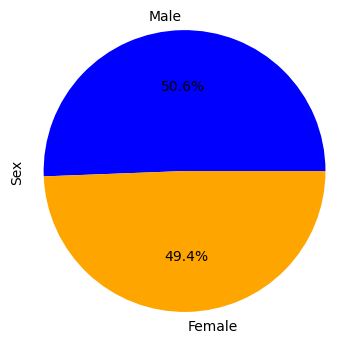

In [11]:

gender_counts = clean_mouse_study['Sex'].value_counts()


gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=['blue', 'orange'], figsize=(4, 4))



plt.ylabel('Sex')


plt.axis('equal')  
plt.show()


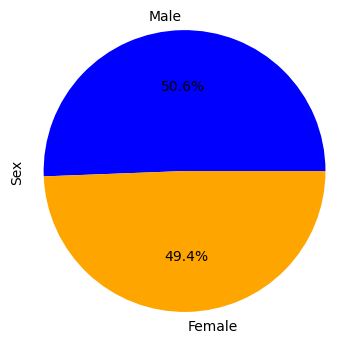

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_mouse_study['Sex'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360, colors=['blue', 'orange'])
plt.ylabel('Sex')
plt.axis('equal') 
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_timepoints_df = clean_mouse_study[clean_mouse_study['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = final_timepoints_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, clean_mouse_study, on=['Mouse ID', 'Timepoint'], how='left')

print(final_tumor_volume_df)


   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
import numpy as np

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(regimen_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    

    print(f"Summary statistics for {regimen}:")
    print(f" - Lower Quartile: {lower_quartile}")
    print(f" - Upper Quartile: {upper_quartile}")
    print(f" - Interquartile Range (IQR): {iqr}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Potential Outliers: {outliers.to_list()}\n")

Summary statistics for Capomulin:
 - Lower Quartile: 32.37735684
 - Upper Quartile: 40.1592203
 - Interquartile Range (IQR): 7.781863460000004
 - Lower Bound: 20.70456164999999
 - Upper Bound: 51.83201549
 - Potential Outliers: []

Summary statistics for Ramicane:
 - Lower Quartile: 31.56046955
 - Upper Quartile: 40.65900627
 - Interquartile Range (IQR): 9.098536719999998
 - Lower Bound: 17.912664470000003
 - Upper Bound: 54.30681135
 - Potential Outliers: []

Summary statistics for Infubinol:
 - Lower Quartile: 54.04860769
 - Upper Quartile: 65.52574285
 - Interquartile Range (IQR): 11.477135160000003
 - Lower Bound: 36.83290494999999
 - Upper Bound: 82.74144559000001
 - Potential Outliers: [36.3213458]

Summary statistics for Ceftamin:
 - Lower Quartile: 48.72207785
 - Upper Quartile: 64.29983003
 - Interquartile Range (IQR): 15.577752179999997
 - Lower Bound: 25.355449580000002
 - Upper Bound: 87.66645829999999
 - Potential Outliers: []



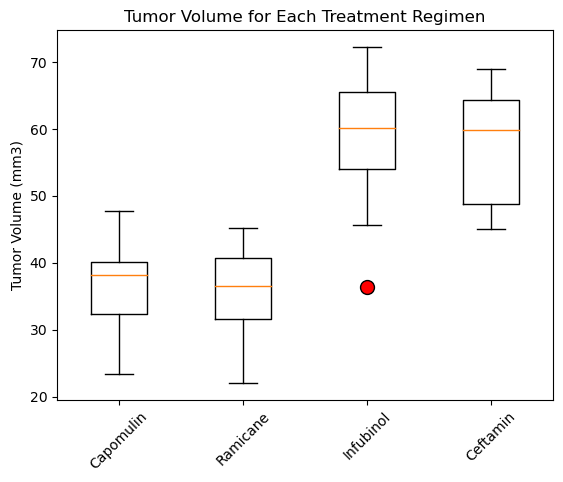

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops={'markerfacecolor':'red', 'markersize': 10})
plt.title('Tumor Volume for Each Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

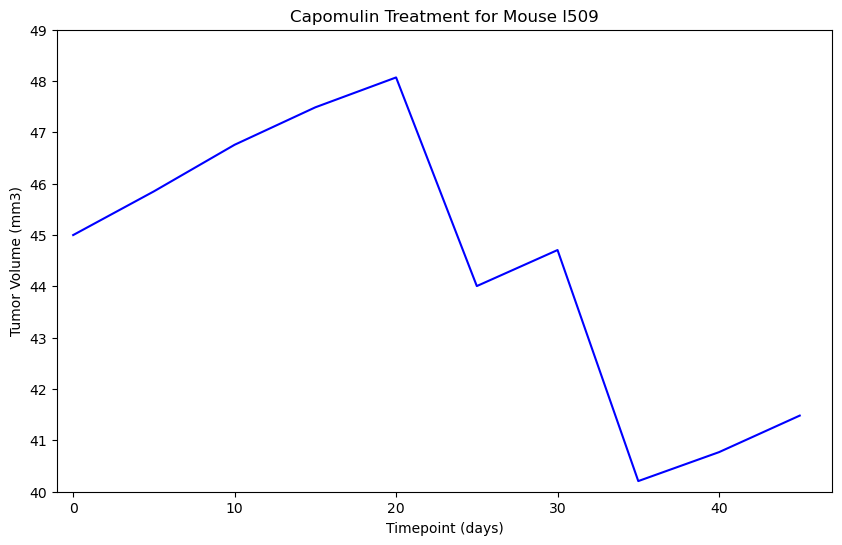

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

target_mouse_id = 'l509'

capomulin_data_for_mouse = clean_mouse_study[(clean_mouse_study['Mouse ID'] == target_mouse_id) & (clean_mouse_study['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_data_for_mouse['Timepoint'], capomulin_data_for_mouse['Tumor Volume (mm3)'], linestyle='-', color='blue')
plt.title(f'Capomulin Treatment for Mouse {target_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(-1, 47)
plt.ylim(40, 49)

plt.xticks(range(0, 47, 10))
plt.yticks(range(40, 50))

plt.grid(False)

plt.show()



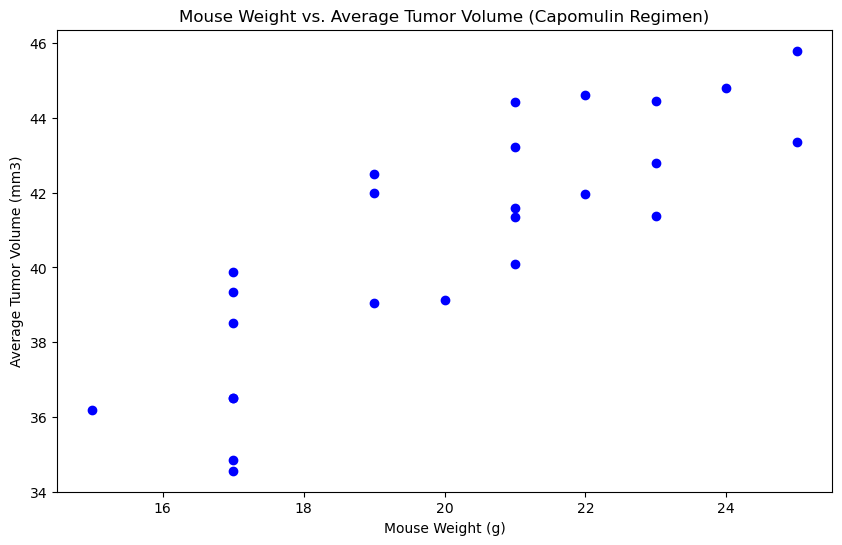

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

scatter_data = pd.DataFrame({'Mouse Weight (g)': mouse_weight, 'Average Tumor Volume (mm3)': average_tumor_volume})

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Mouse Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], marker='o', color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()


## Correlation and Regression

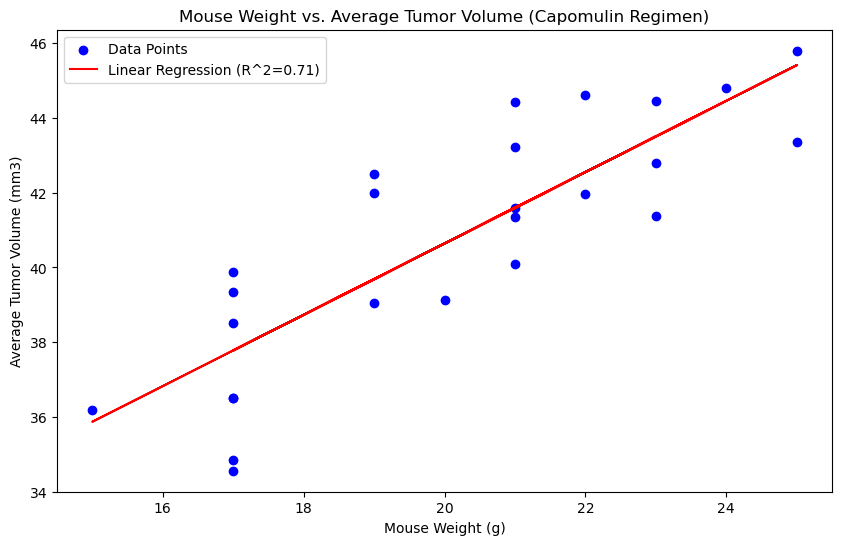

Correlation Coefficient: 0.84


In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

correlation = scatter_data['Mouse Weight (g)'].corr(scatter_data['Average Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = linregress(scatter_data['Mouse Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])

regress_values = scatter_data['Mouse Weight (g)'] * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Mouse Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], marker='o', color='blue', label='Data Points')
plt.plot(scatter_data['Mouse Weight (g)'], regress_values, 'r-', label=f'Linear Regression (R^2={r_value**2:.2f})')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.legend()
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation:.2f}')
